## Avacado Project

## Region Prediction through Classification Models.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importing the Data Set

In [3]:
ava = pd.read_csv(r"C:\Users\Kushal Kulkarni\Downloads\avocado\avocado.csv")

In [4]:
ava

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [5]:
ava.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [6]:
ava.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [7]:
ava.sample(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
3416,36,2016-04-17,0.69,1339725.73,646060.26,232035.65,113528.02,348101.80,318316.06,28701.42,1084.32,conventional,2016,DallasFtWorth
2134,2,2015-12-13,0.84,462548.30,155111.21,118664.89,16726.87,172045.33,128053.44,43991.89,0.00,conventional,2015,SanDiego
3940,40,2016-03-20,0.82,332283.27,127949.65,116701.74,13632.17,73999.71,36410.06,37589.65,0.00,conventional,2016,LasVegas
8622,0,2018-03-25,1.02,950483.37,176286.79,222958.27,16540.62,534697.69,121655.40,413042.29,0.00,conventional,2018,Denver
16801,46,2017-02-12,1.12,10485.46,424.16,3355.43,236.07,6469.80,2421.74,4048.06,0.00,organic,2017,RichmondNorfolk
5033,41,2016-03-13,1.41,714002.30,192002.80,383557.60,52459.24,85982.66,85202.82,726.43,53.41,conventional,2016,SanFrancisco
5382,26,2016-06-26,1.43,84340.47,1952.47,52517.17,13.00,29857.83,28352.83,0.00,1505.00,conventional,2016,Syracuse
424,8,2015-11-01,1.00,807041.46,69420.04,562214.56,106536.92,68869.94,68447.93,422.01,0.00,conventional,2015,Chicago
4079,23,2016-07-17,1.24,516716.17,241386.54,136077.96,190.34,139061.33,79192.74,43113.59,16755.00,conventional,2016,MiamiFtLauderdale
7967,19,2017-08-20,1.40,348843.91,158452.34,70864.82,2138.00,117388.75,84288.40,28388.92,4711.43,conventional,2017,SouthCarolina


Observations about Data Set:
    
1) This data Set has total 14 number of columns which means total 14 different attributes.

2) Total no. of rows in set is more then 18 thousand which means we are having more then 18 thousand number of instances in the set.

3) The first column 'Unnamed' is a kind of index in our data for the particular year.

4) The date describes the day when the particular data has been taken.

5) Other are the various attributes in data set about Avacado such as its price, volume, its PLU, Type of Bags, type of avacode, the year of data and the region.

5.1) In this project there are two problem statements ;

   A) - A classification prediction where we need to predict the region on the basis of attributes.
   
   B) - A Regression prediction where we need to predict the price on the baisis of other attributes.

In [8]:
ava.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


Observations:
    
1) There are total 3 types of data set in set, float, int and object.

2) We have total 18249 no. of instances and from above table it can be seen that there is no nul value in any of the column which a good thing regarding this data set.

3) Currently we will drop 2 columns from our data set which are 'Unnamed' and 'Date'. The reason for the following is that the indexing for the data for particular is not needed and the date column will not be required as we already have a different column of year in our set.

4) We will aslo Drop another column of total bags which is a total of small bags, large bags and extra large bags. As we are having different column for every each of them the totalbags column is not seperatly.

We will drop these columns first and then go ahead with our further approach.

In [9]:
ava1 = ava.drop(['Unnamed: 0', 'Date', 'Total Bags'], axis =1)

In [10]:
ava1

,AveragePrice,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8603.62,93.25,0.0,conventional,2015,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9408.07,97.49,0.0,conventional,2015,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8042.21,103.14,0.0,conventional,2015,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5677.40,133.76,0.0,conventional,2015,Albany
4,1.28,51039.60,941.48,43838.39,75.78,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,1.71,13888.04,1191.70,3431.50,0.00,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,1.87,13766.76,1191.92,2452.79,727.94,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,1.93,16205.22,1527.63,2981.04,727.01,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


So we have now dropped the columns which were not helpfull. Now we will go ahead with our first approach of classification of region.

In [11]:
ava1.describe()

,AveragePrice,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.338459e+07,5.719097e+06,551693.650000,2018.000000


Observations:
    
1) The count for each column is same which is good for our data set.

2) The Standard Deviation seems to be a bit on higher side except avearage & year. It is more higher in columns of small bags & large bags and extra large bags.

3) The difference between mean & median can be seen in columns of Total Volume, 4046, Large bags, and Xtralarge bags. Which suggests the skewness in the data of the column.

4) The difference between 75% and maximum value can be seen in columns like 4770, small bags, xlarge bags which suggests the outliers in the columns.

In [12]:
ava1.nunique()

AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

In [13]:
ava1['region'].value_counts()

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

So Here We can se all the regions are having almost same no. of data in each of them which mean the data is balanced in case of regions and there is no need of using Overfitting or Underfitting methods.

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


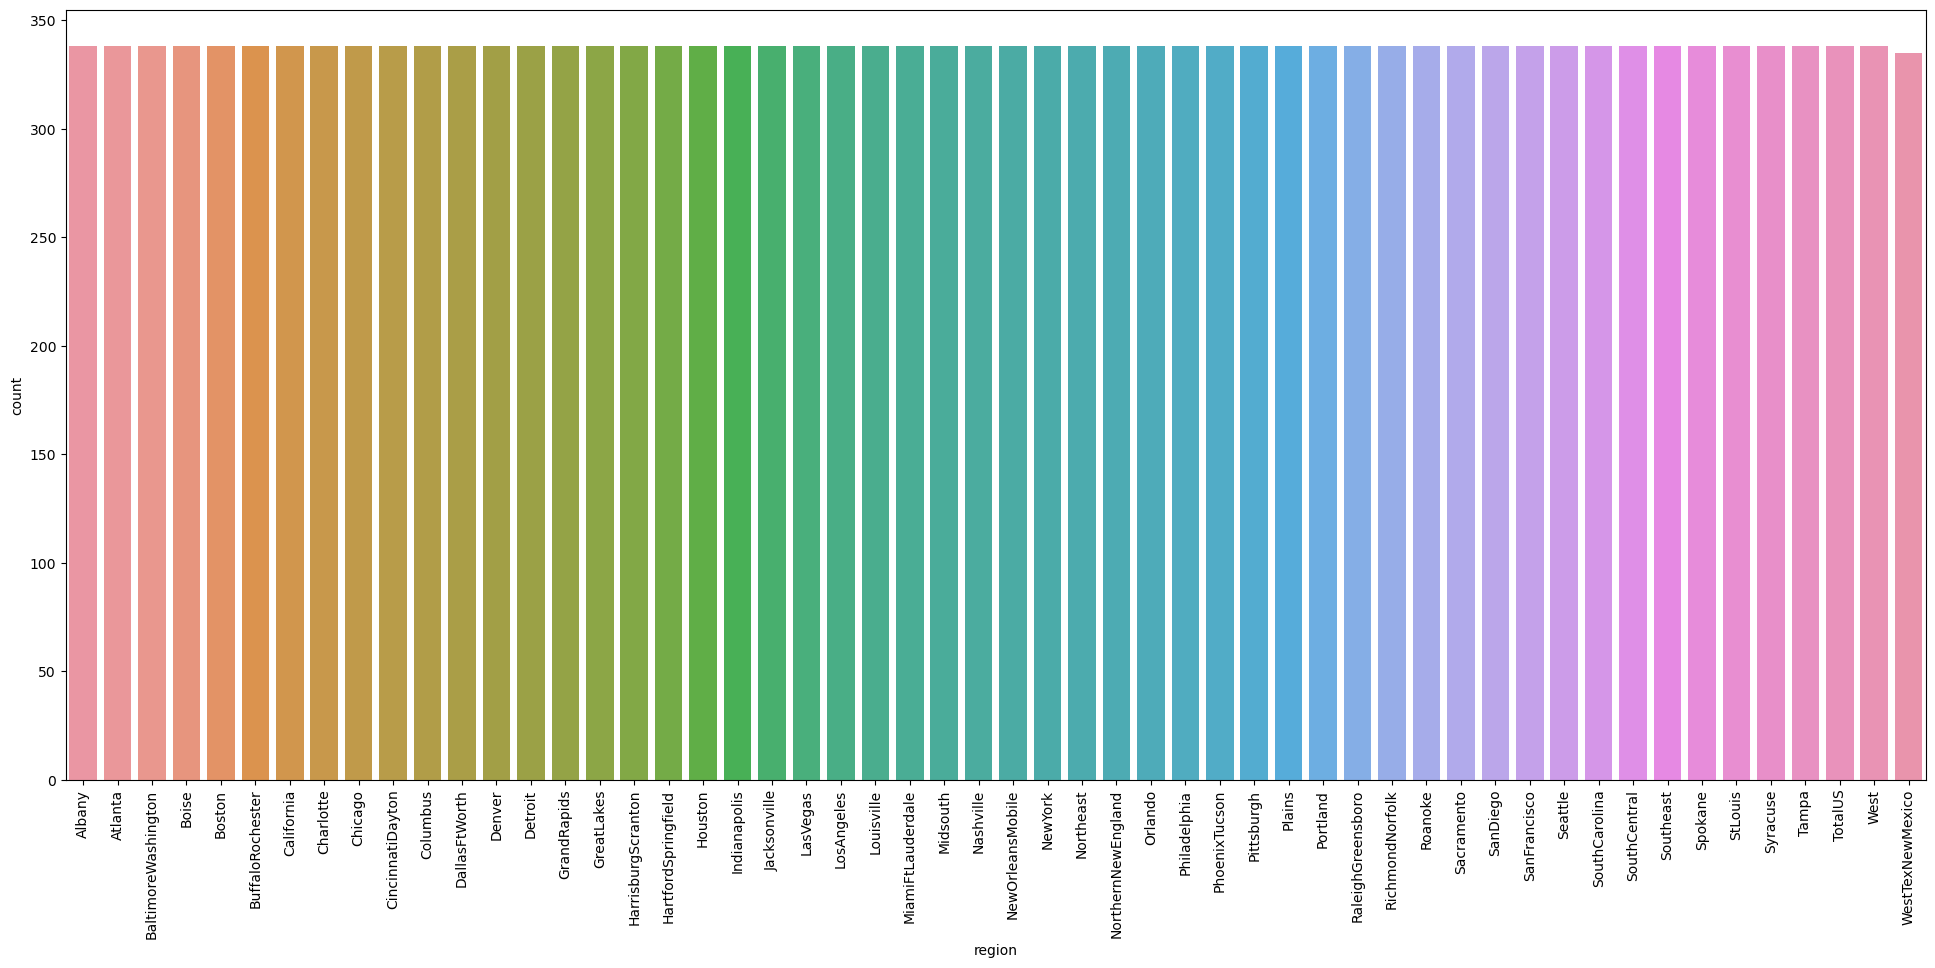

In [18]:
plt.figure(figsize = (24,10))
sns.countplot(ava1['region'])
plt.xticks(rotation = 90)
plt.show()

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='count'>

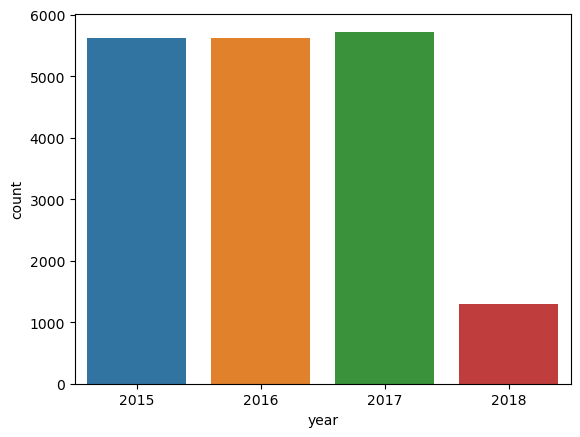

In [19]:
sns.countplot(ava1['year'])

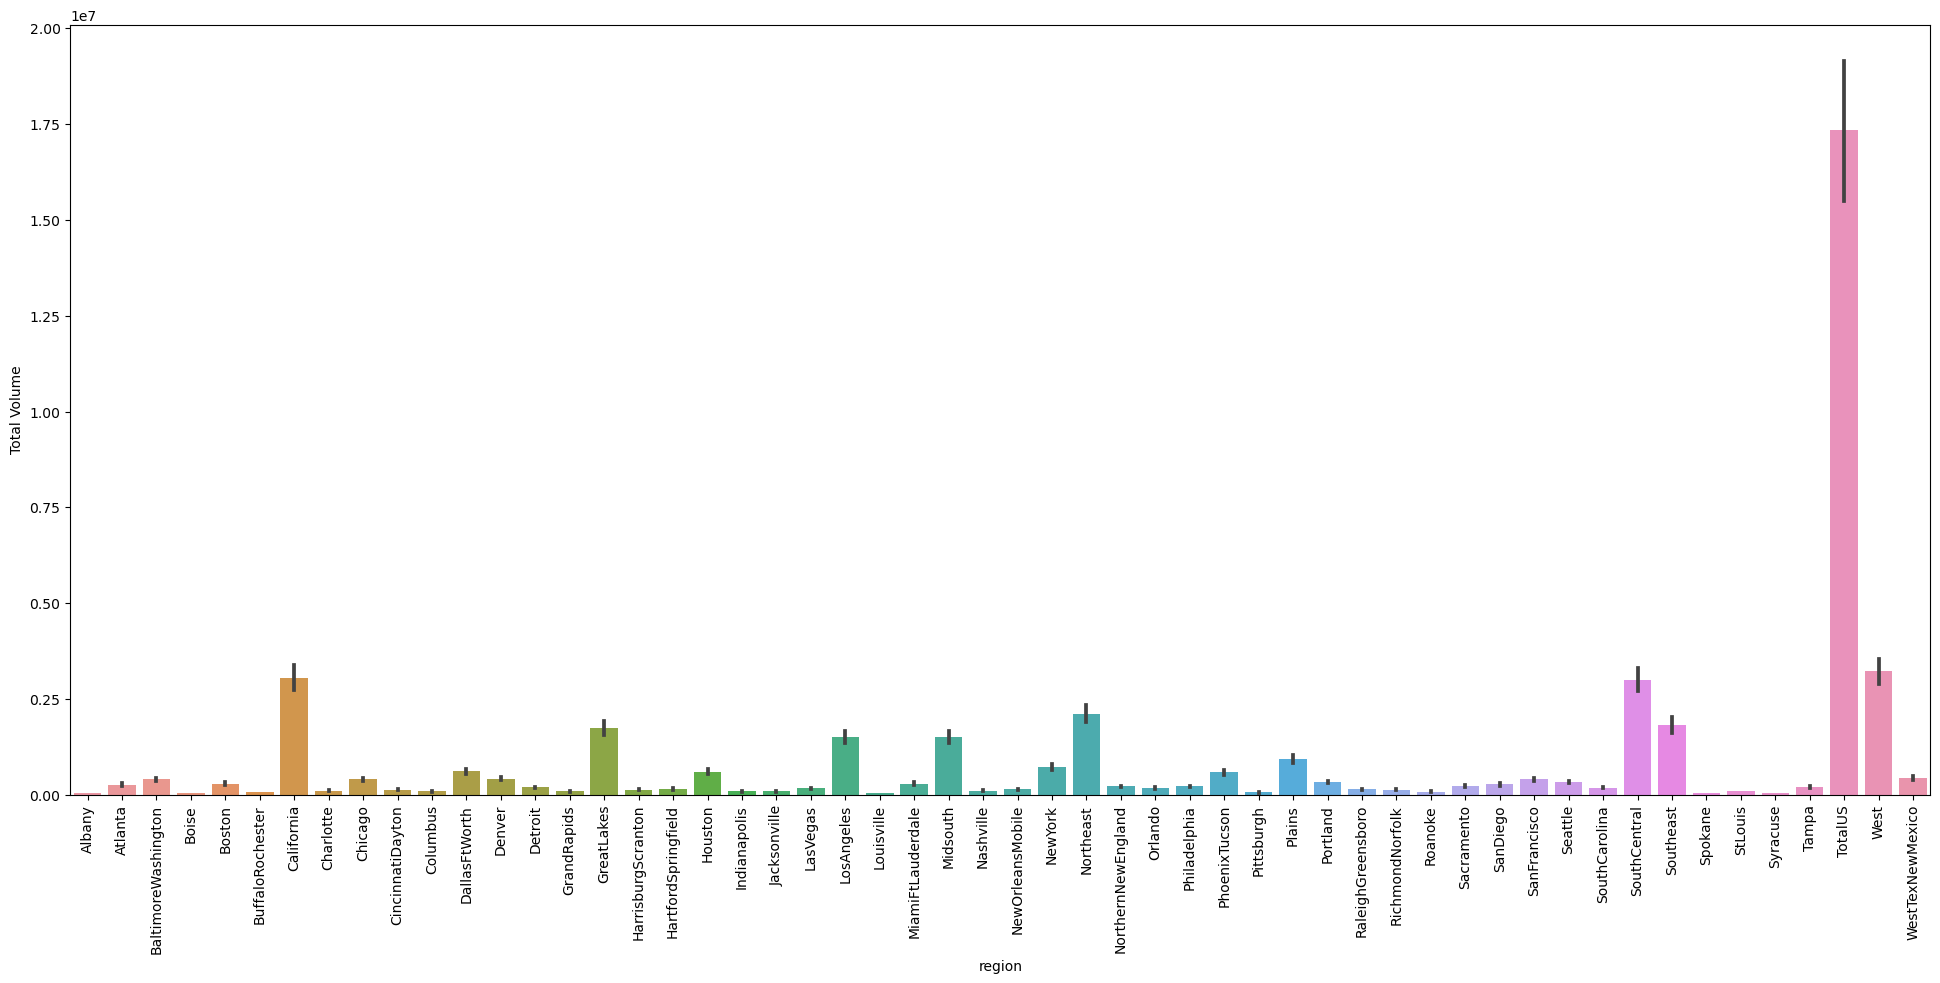

In [21]:
plt.figure(figsize = (24,10))
sns.barplot(x = 'region', y = 'Total Volume', data = ava1)
plt.xticks(rotation = 90)
plt.show()

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='type', ylabel='count'>

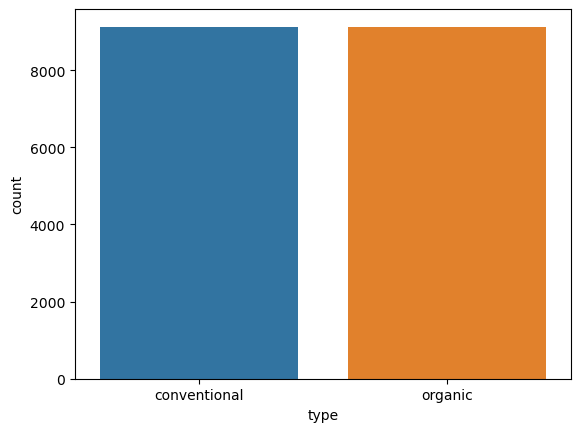

In [22]:
sns.countplot(ava1['type'])

In [15]:
ava1.skew()

C:\Users\Kushal Kulkarni\AppData\Local\Temp\ipykernel_13416\1544150398.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ava1.skew()


AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
dtype: float64

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


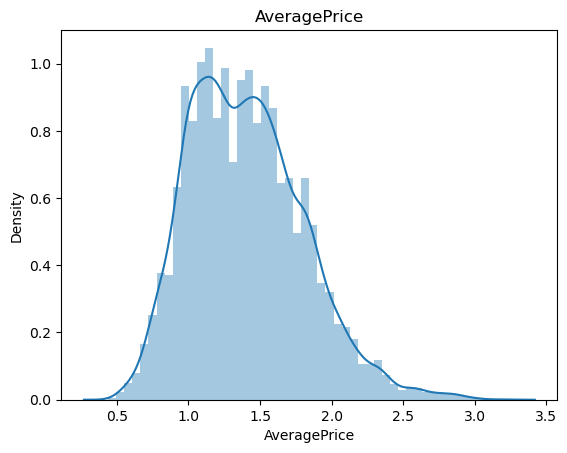

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


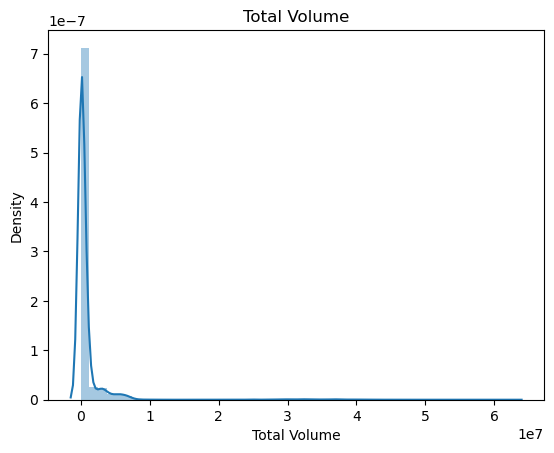

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


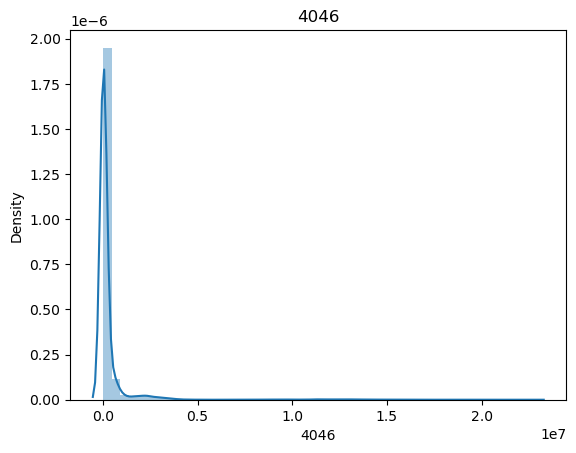

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


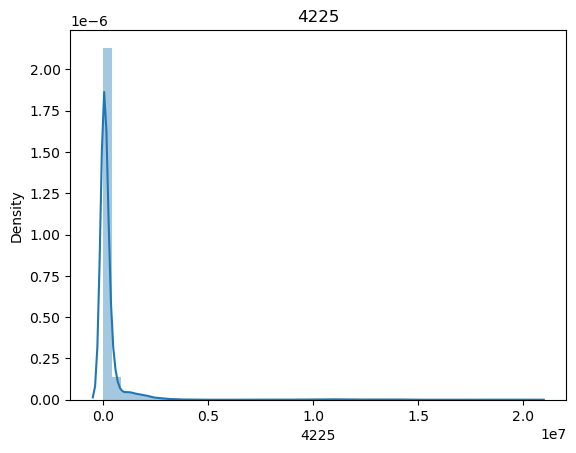

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


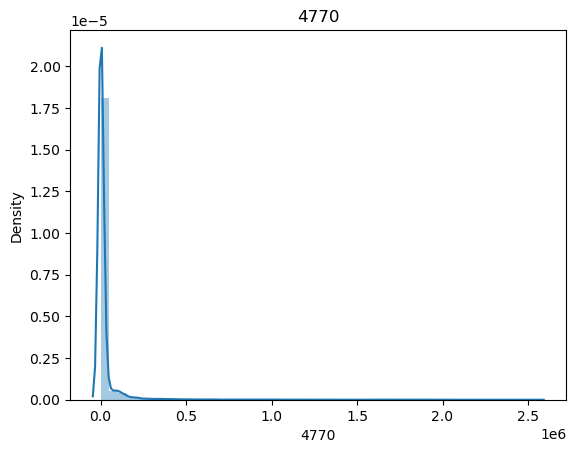

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


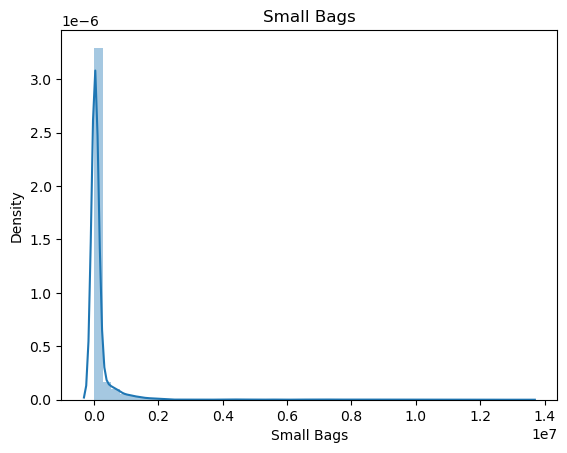

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


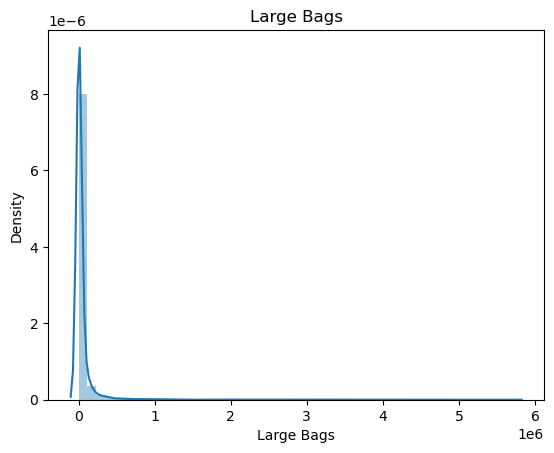

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


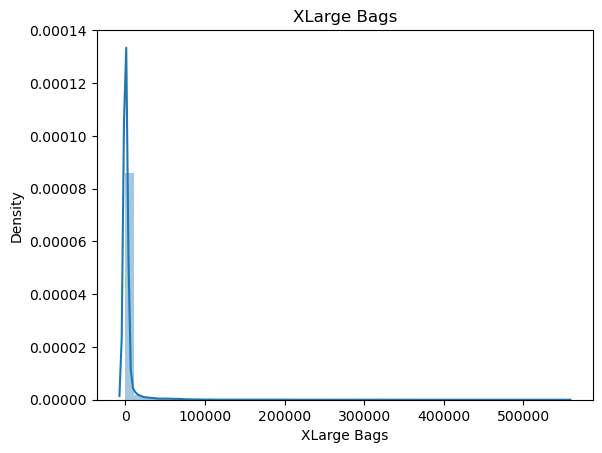

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


ValueError: could not convert string to float: 'conventional'

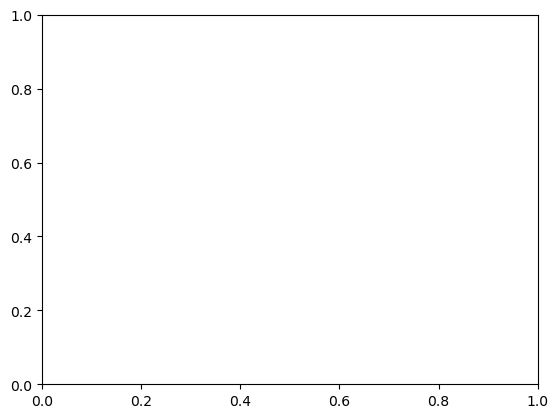

In [16]:
for i in ava1.columns:                
    sns.distplot(ava1[i])
    plt.title(i)
    plt.show()

So from the skewness values and above distribution plots the skewness can be seen in most of the columns hence we will try to remove those.

In [23]:
ava1.skew()

C:\Users\Kushal Kulkarni\AppData\Local\Temp\ipykernel_13416\1544150398.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ava1.skew()


AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
dtype: float64

In [24]:
from scipy.stats import boxcox

In [25]:
ava1['Total Volume'] = boxcox(ava1['Total Volume'],0.1)

In [26]:
ava1['Total Volume'].skew()

0.5641268893936509

In [27]:
ava1['4046'] = boxcox(ava1['4046'],0.1)

In [28]:
ava1['4046'].skew()

0.14170835224150685

In [29]:
ava1['4225'] = boxcox(ava1['4225'],0.1)

In [30]:
ava1['4225'].skew()

0.13374391511826095

In [31]:
ava1['4770'] = boxcox(ava1['4770'],0.1)

In [32]:
ava1['4770'].skew()

-0.13980276556895507

In [33]:
ava1['Small Bags'] = boxcox(ava1['Small Bags'],0.1)

In [34]:
ava1['Small Bags'].skew()

-0.15075923572189337

In [35]:
ava1['Large Bags'] = boxcox(ava1['Large Bags'],0.1)

In [36]:
ava1['Large Bags'].skew()

-0.6915993492796411

In [37]:
ava1['XLarge Bags'] = boxcox(ava1['XLarge Bags'],0.1)

In [38]:
ava1['XLarge Bags'].skew()

0.9638393279386364

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


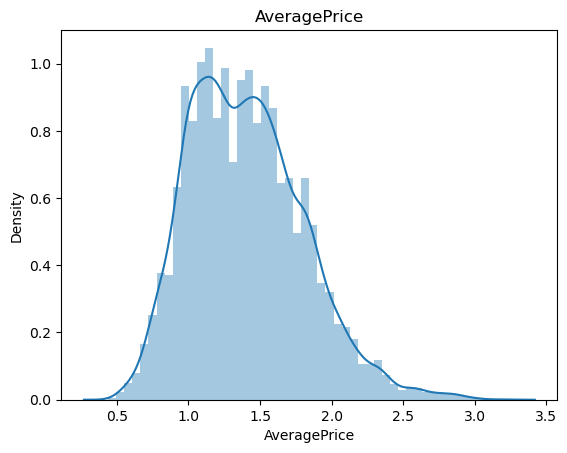

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


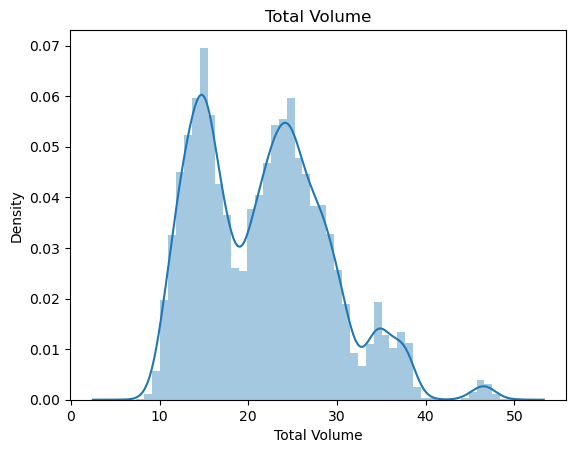

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


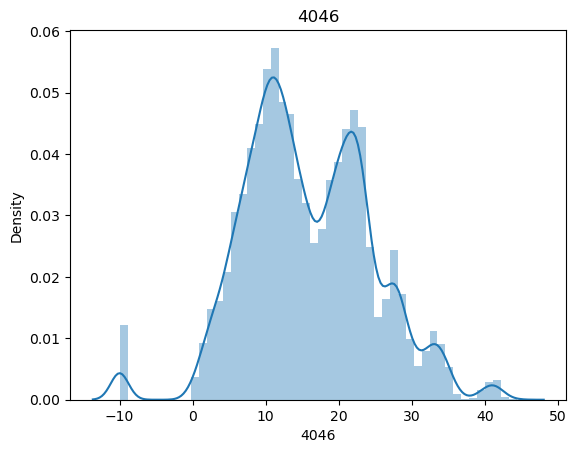

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


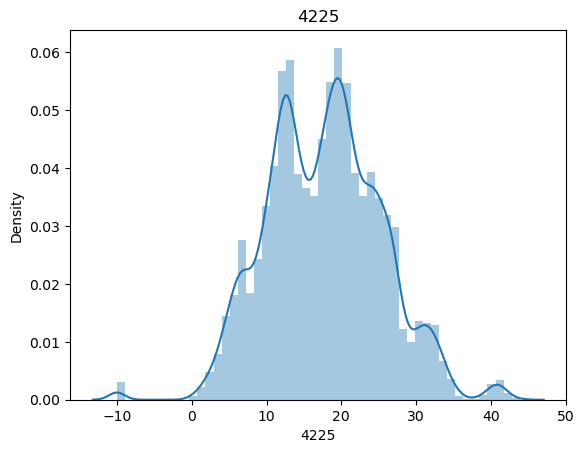

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


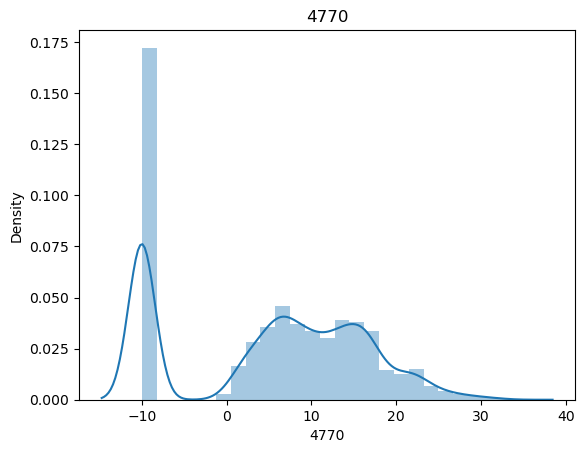

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


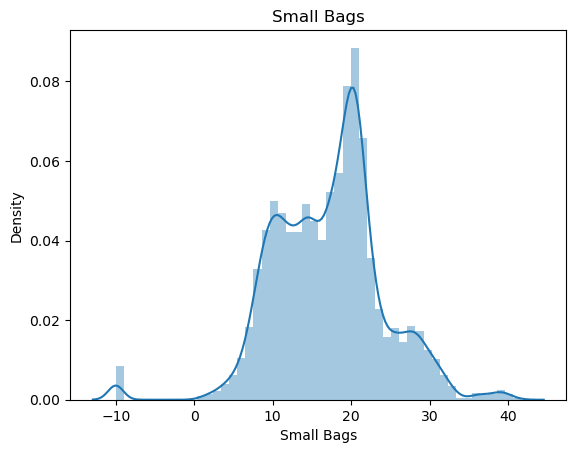

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


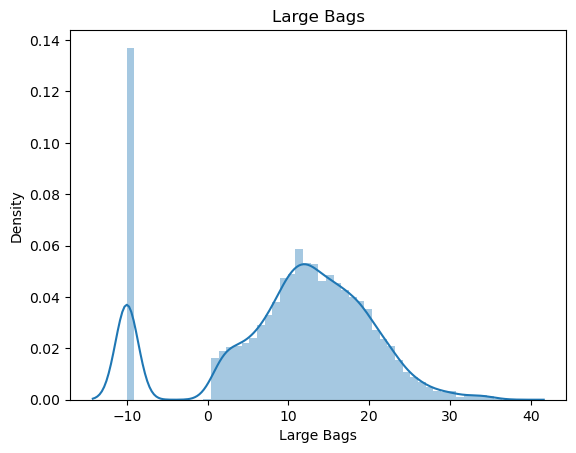

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


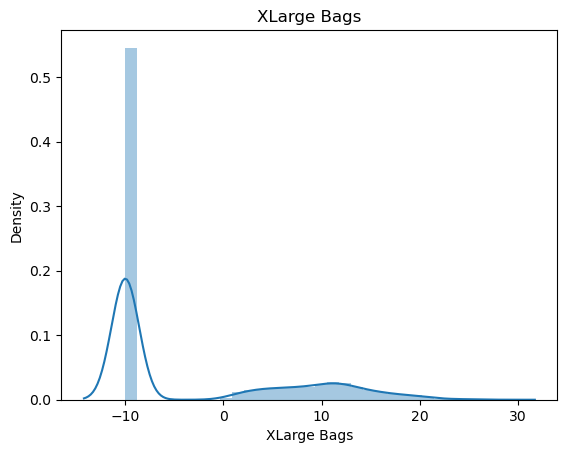

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


ValueError: could not convert string to float: 'conventional'

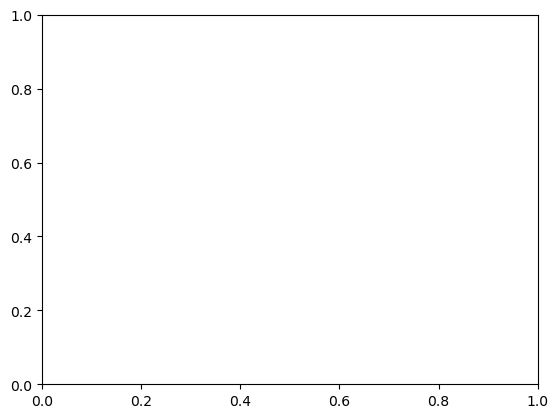

In [39]:
for i in ava1.columns:                
    sns.distplot(ava1[i])
    plt.title(i)
    plt.show()

So we have removed the skewness of all the columns as maximum as possible. And we can see the effect of the same in skewness values as well the distribution plot of every column.

Note - We have tried every method possible to remove skewness such as np.log, np.lpg1p, np.cbrt, np.sqrt. after checking all the methods we have finalised the boxcox method.

In [40]:
ava1.skew()

C:\Users\Kushal Kulkarni\AppData\Local\Temp\ipykernel_13416\1544150398.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ava1.skew()


AveragePrice    0.580303
Total Volume    0.564127
4046            0.141708
4225            0.133744
4770           -0.139803
Small Bags     -0.150759
Large Bags     -0.691599
XLarge Bags     0.963839
year            0.215339
dtype: float64

In [41]:
ava1.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Small Bags',
       'Large Bags', 'XLarge Bags', 'type', 'year', 'region'],
      dtype='object')

We have already checked the distribution of classes in our target variable - 'Region' and found that the most of the classes are having no. same values hence our target variable is balanced. So now we will change our object columns into float and go ahead. 

In [42]:
from sklearn.preprocessing import OrdinalEncoder

In [43]:
oe = OrdinalEncoder()

for i in ava1.columns:
    if ava1[i].dtypes == 'object':
        ava1[i] = oe.fit_transform(ava1[i].values.reshape(-1,1))

In [44]:
ava1.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type            float64
year              int64
region          float64
dtype: object

In [45]:
ava1

,AveragePrice,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,20.253684,10.024745,19.757994,4.732235,14.743898,5.738556,-10.0,0.0,2015,0.0
1,1.35,19.780982,9.181565,19.172340,5.017208,14.966063,5.808695,-10.0,0.0,2015,0.0
2,0.93,22.156530,9.499358,21.900849,6.276501,14.577491,5.898008,-10.0,0.0,2015,0.0
3,1.08,20.885767,10.201548,20.599830,5.349057,13.736405,6.316711,-10.0,0.0,2015,0.0
4,1.28,19.565874,9.832667,19.119604,5.415423,13.862479,6.966743,-10.0,0.0,2015,0.0
...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,16.499375,11.434380,10.818356,-10.000000,15.799839,8.345658,-10.0,1.0,2018,53.0
18245,1.71,15.957574,10.305641,12.570875,-10.000000,14.838991,7.830421,-10.0,1.0,2018,53.0
18246,1.87,15.934816,10.306015,11.825592,9.329008,14.951090,4.542675,-10.0,1.0,2018,53.0
18247,1.93,16.361219,10.816218,12.255471,9.326537,15.340807,4.787576,-10.0,1.0,2018,53.0


So we have changed our data to numeric format for all the columns. We wil check the correlation of all the columns with our target variable.

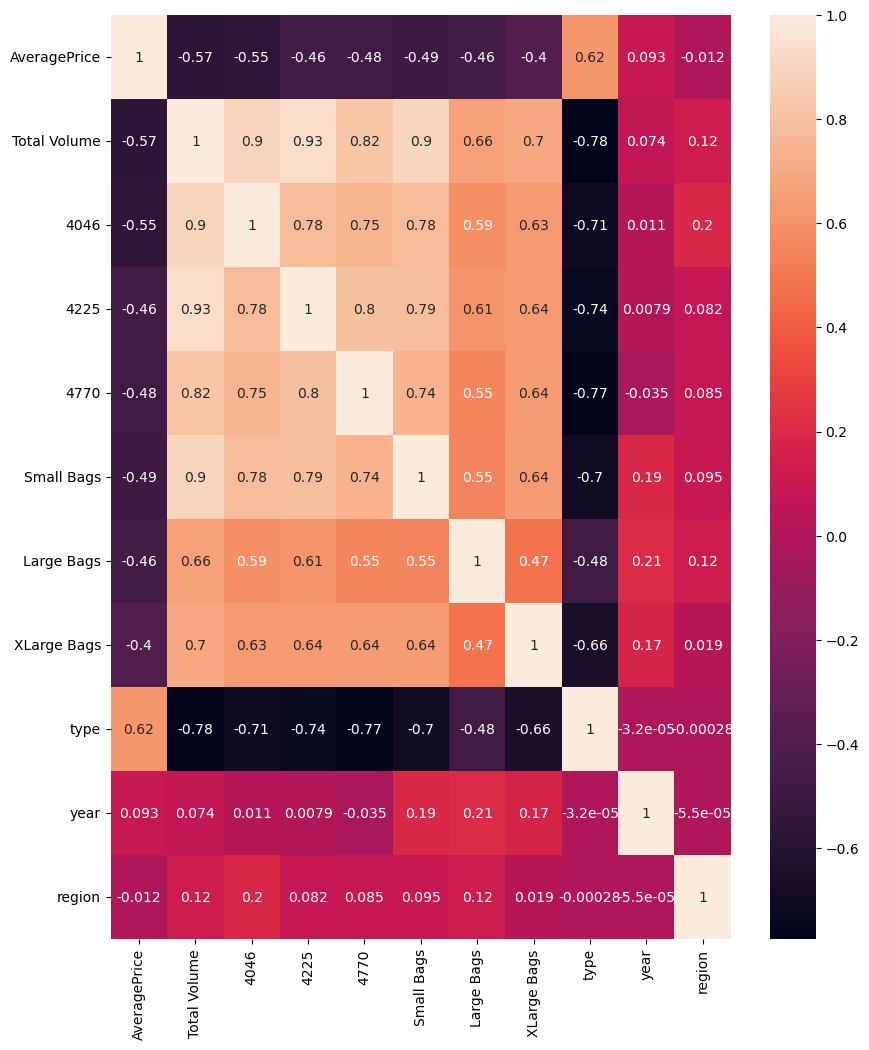

In [46]:
plt.figure(figsize = (10,12))
sns.heatmap(ava1.corr(), annot = True)
plt.show()

So through the Heatmap it can be seen that all the columns are having nearly a neutral relationship with out taret variable 'Region'.

Now we will check for the outliers in the columns and try to remove it.

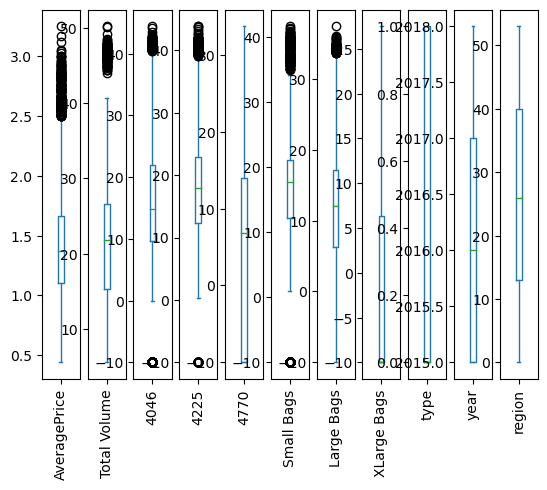

In [47]:
ava1.plot(kind = 'box', subplots = True, layout = (1,11),rot = 90)
plt.show()

Outliers Can be seen in the data set and we will now remove them with ZScore.

In [48]:
from scipy.stats import zscore

In [49]:
Z = np.abs(zscore(ava1))

In [50]:
Z

,AveragePrice,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.188689,0.214062,0.663885,0.261776,0.026421,0.344781,0.476903,0.683753,0.999836,1.221282,1.700252
1,0.139020,0.277999,0.760775,0.184975,0.001019,0.312693,0.469871,0.683753,0.999836,1.221282,1.700252
2,1.182069,0.043316,0.724257,0.542784,0.111235,0.368815,0.460917,0.683753,0.999836,1.221282,1.700252
3,0.809551,0.128566,0.643568,0.372172,0.028562,0.490296,0.418939,0.683753,0.999836,1.221282,1.700252
4,0.312861,0.307094,0.685957,0.178059,0.034478,0.472087,0.353768,0.683753,0.999836,1.221282,1.700252
...,...,...,...,...,...,...,...,...,...,...,...
18244,0.556347,0.721868,0.501902,0.910543,1.339656,0.192268,0.215522,0.683753,1.000164,1.970504,1.700811
18245,0.755023,0.795151,0.631607,0.680722,1.339656,0.331046,0.267178,0.683753,1.000164,1.970504,1.700811
18246,1.152375,0.798230,0.631564,0.778457,0.383336,0.314855,0.596799,0.683753,1.000164,1.970504,1.700811
18247,1.301382,0.740554,0.572936,0.722084,0.383115,0.258567,0.572246,0.683753,1.000164,1.970504,1.700811


In [51]:
threshold = 3
print(np.where(Z>3))

(array([ 2652,  2653,  2654,  2655,  2655,  2656,  2657,  2658,  2658,
        2659,  2659,  2660,  2660,  2661,  2661,  2662,  2662,  2663,
        2663,  2664,  2664,  2665,  2665,  2666,  2666,  2667,  2667,
        2668,  2668,  2669,  2669,  2670,  2670,  2671,  2671,  2672,
        2672,  2673,  2673,  2674,  2674,  2675,  2675,  2676,  2676,
        2677,  2677,  2677,  2678,  2678,  2679,  2679,  2679,  2680,
        2680,  2680,  2681,  2681,  2681,  2682,  2682,  2682,  2683,
        2683,  2683,  2684,  2684,  2685,  2685,  2685,  2686,  2686,
        2686,  2687,  2688,  2688,  2688,  2689,  2689,  2689,  2690,
        2690,  2691,  2691,  2692,  2692,  2693,  2694,  2695,  2695,
        2696,  2696,  2697,  2698,  2698,  2699,  2699,  2699,  2700,
        2701,  2701,  2702,  2702,  2703,  2703,  5460,  5460,  5461,
        5461,  5462,  5462,  5463,  5463,  5464,  5465,  5466,  5467,
        5469,  5469,  5470,  5470,  5471,  5471,  5472,  5472,  5473,
        5473,  5474

In [52]:
Z.sample(20)

,AveragePrice,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region
2732,1.206903,2.212562,2.180302,2.061506,1.513780,1.688073,1.367394,0.878050,0.999836,1.221282,1.636640
10516,0.630850,1.120552,0.960166,0.687445,0.094850,1.055060,0.160288,0.683753,1.000164,1.221282,0.031806
7041,1.802932,0.579067,0.893950,0.171728,0.131228,0.775003,0.652578,0.887095,0.999836,0.906575,0.031806
2766,1.480083,0.876043,1.219152,0.751409,1.004331,0.534448,0.081755,0.683753,0.999836,1.221282,1.700811
5088,1.355910,0.929896,0.467345,0.837029,0.862728,1.418346,0.233629,1.140836,0.999836,0.157353,1.059101
1695,0.014847,0.654846,0.059265,0.951486,0.448571,0.768262,0.598767,0.421244,0.999836,1.221282,0.353220
2870,0.610875,0.675826,0.907276,0.425275,0.078618,0.588655,1.118718,0.683753,0.999836,0.157353,1.636081
7432,0.213523,0.017621,0.382589,0.029316,0.519572,0.027906,0.431227,0.643347,0.999836,0.906575,0.481562
9289,0.233498,1.591686,1.479963,1.104227,1.339656,1.813311,0.299402,0.683753,1.000164,1.221282,1.507739
10588,0.879195,0.801913,0.404623,0.373165,0.039300,1.321233,0.056748,0.683753,1.000164,1.221282,0.096536


In [53]:
ava2 = ava1[(Z<3).all(axis =1)]

In [54]:
ava2

,AveragePrice,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,20.253684,10.024745,19.757994,4.732235,14.743898,5.738556,-10.0,0.0,2015,0.0
1,1.35,19.780982,9.181565,19.172340,5.017208,14.966063,5.808695,-10.0,0.0,2015,0.0
2,0.93,22.156530,9.499358,21.900849,6.276501,14.577491,5.898008,-10.0,0.0,2015,0.0
3,1.08,20.885767,10.201548,20.599830,5.349057,13.736405,6.316711,-10.0,0.0,2015,0.0
4,1.28,19.565874,9.832667,19.119604,5.415423,13.862479,6.966743,-10.0,0.0,2015,0.0
...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,16.499375,11.434380,10.818356,-10.000000,15.799839,8.345658,-10.0,1.0,2018,53.0
18245,1.71,15.957574,10.305641,12.570875,-10.000000,14.838991,7.830421,-10.0,1.0,2018,53.0
18246,1.87,15.934816,10.306015,11.825592,9.329008,14.951090,4.542675,-10.0,1.0,2018,53.0
18247,1.93,16.361219,10.816218,12.255471,9.326537,15.340807,4.787576,-10.0,1.0,2018,53.0


So We have removed the outliers from our data set. Now we will standardize our data and move ahead.

In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
x = ava2.iloc[:,:-1]
y =ava2.iloc[:,-1]

In [57]:
x

,AveragePrice,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year
0,1.33,20.253684,10.024745,19.757994,4.732235,14.743898,5.738556,-10.0,0.0,2015
1,1.35,19.780982,9.181565,19.172340,5.017208,14.966063,5.808695,-10.0,0.0,2015
2,0.93,22.156530,9.499358,21.900849,6.276501,14.577491,5.898008,-10.0,0.0,2015
3,1.08,20.885767,10.201548,20.599830,5.349057,13.736405,6.316711,-10.0,0.0,2015
4,1.28,19.565874,9.832667,19.119604,5.415423,13.862479,6.966743,-10.0,0.0,2015
...,...,...,...,...,...,...,...,...,...,...
18244,1.63,16.499375,11.434380,10.818356,-10.000000,15.799839,8.345658,-10.0,1.0,2018
18245,1.71,15.957574,10.305641,12.570875,-10.000000,14.838991,7.830421,-10.0,1.0,2018
18246,1.87,15.934816,10.306015,11.825592,9.329008,14.951090,4.542675,-10.0,1.0,2018
18247,1.93,16.361219,10.816218,12.255471,9.326537,15.340807,4.787576,-10.0,1.0,2018


In [58]:
x.shape

(17733, 10)

In [59]:
y

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
18244    53.0
18245    53.0
18246    53.0
18247    53.0
18248    53.0
Name: region, Length: 17733, dtype: float64

In [60]:
y.shape

(17733,)

In [61]:
sc = StandardScaler()

x1 = pd.DataFrame(sc.fit_transform(x), columns = x.columns)
x1

,AveragePrice,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year
0,-0.170083,-0.213589,-0.673839,0.284344,-0.024502,-0.406445,-0.474483,-0.685883,-0.989733,-1.225718
1,-0.118398,-0.280999,-0.774071,0.202871,0.001396,-0.370374,-0.467328,-0.685883,-0.989733,-1.225718
2,-1.203781,0.057765,-0.736294,0.582447,0.115840,-0.433463,-0.458216,-0.685883,-0.989733,-1.225718
3,-0.816144,-0.123452,-0.652822,0.401456,0.031555,-0.570023,-0.415499,-0.685883,-0.989733,-1.225718
4,-0.299295,-0.311674,-0.696672,0.195534,0.037586,-0.549553,-0.349181,-0.685883,-0.989733,-1.225718
...,...,...,...,...,...,...,...,...,...,...
17728,0.605191,-0.748971,-0.506270,-0.959292,-1.363360,-0.235001,-0.208501,-0.685883,1.010374,1.963355
17729,0.811931,-0.826234,-0.640448,-0.715491,-1.363360,-0.391006,-0.261066,-0.685883,1.010374,1.963355
17730,1.225411,-0.829479,-0.640403,-0.819171,0.393251,-0.372805,-0.596490,-0.685883,1.010374,1.963355
17731,1.380465,-0.768672,-0.579753,-0.759368,0.393026,-0.309530,-0.571505,-0.685883,1.010374,1.963355


We have standardize our independent Variables and now we will look for Variance Inflation Factor.

In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [63]:
vari = variance_inflation_factor

In [64]:
vif = pd.DataFrame()

vif['Values'] = [vari(x1.values,i) for i in range(len(x1.columns))]
vif['Features'] = x1.columns

In [65]:
vif

,Values,Features
0,2.120099,AveragePrice
1,51.421828,Total Volume
2,6.387121,4046
3,13.827676,4225
4,3.806709,4770
5,10.845876,Small Bags
6,2.027583,Large Bags
7,2.103854,XLarge Bags
8,3.770351,type
9,1.366119,year


So here we can see that Variance Inflation factor for Total Volume column is Very high. Hence we will drop that column and again check the variance inflation sector of other columns.

In [66]:
x1.drop('Total Volume', axis = 1, inplace = True)

In [67]:
x1

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year
0,-0.170083,-0.673839,0.284344,-0.024502,-0.406445,-0.474483,-0.685883,-0.989733,-1.225718
1,-0.118398,-0.774071,0.202871,0.001396,-0.370374,-0.467328,-0.685883,-0.989733,-1.225718
2,-1.203781,-0.736294,0.582447,0.115840,-0.433463,-0.458216,-0.685883,-0.989733,-1.225718
3,-0.816144,-0.652822,0.401456,0.031555,-0.570023,-0.415499,-0.685883,-0.989733,-1.225718
4,-0.299295,-0.696672,0.195534,0.037586,-0.549553,-0.349181,-0.685883,-0.989733,-1.225718
...,...,...,...,...,...,...,...,...,...
17728,0.605191,-0.506270,-0.959292,-1.363360,-0.235001,-0.208501,-0.685883,1.010374,1.963355
17729,0.811931,-0.640448,-0.715491,-1.363360,-0.391006,-0.261066,-0.685883,1.010374,1.963355
17730,1.225411,-0.640403,-0.819171,0.393251,-0.372805,-0.596490,-0.685883,1.010374,1.963355
17731,1.380465,-0.579753,-0.759368,0.393026,-0.309530,-0.571505,-0.685883,1.010374,1.963355


In [68]:
vif1 = pd.DataFrame()
vif1['Values'] = [vari(x1.values,i) for i in range(len(x1.columns))]
vif1['Features'] = x1.columns

In [69]:
vif1

,Values,Features
0,1.915093,AveragePrice
1,3.624907,4046
2,4.694660,4225
3,3.786421,4770
4,4.796795,Small Bags
5,1.900220,Large Bags
6,2.088193,XLarge Bags
7,3.770215,type
8,1.365992,year


So the variance inflation factor for the columns now seems to be in the limit. So now we can go ahead with implementing the various classification models on it.

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [71]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x1,y, test_size = 0.30, random_state = 42)

In [72]:
lg = LogisticRegression()
lg.fit(x_train,y_train)
lgpred = lg.predict(x_test)
lgacc = accuracy_score(y_test, lgpred)
lgcon = confusion_matrix(y_test, lgpred)
lgclass = classification_report(y_test, lgpred)

print(lgacc)
print(lgcon)

0.5050751879699248
[[78  0  0 ...  0  0  0]
 [ 0 40  0 ...  0  0  0]
 [ 0  0 53 ...  0  0  3]
 ...
 [ 0  0  0 ... 45  1  0]
 [ 0  0  0 ...  0 95  0]
 [ 0  7  1 ...  0  0 15]]


C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [73]:
rfc = RandomForestClassifier()

rfc.fit(x_train,y_train)
rfcpred = rfc.predict(x_test)
rfcacc = accuracy_score(y_test, rfcpred)
rfccon = confusion_matrix(y_test, rfcpred)
rfcclass = classification_report(y_test, rfcpred)

print(rfcacc.round(2))
print(rfccon)

0.91
[[101   0   0 ...   0   0   0]
 [  0  78   0 ...   0   0   0]
 [  0   0  99 ...   0   0   0]
 ...
 [  0   0   0 ...  46   0   0]
 [  0   0   0 ...   1 105   0]
 [  0   1   1 ...   0   0  89]]


In [74]:
etc = ExtraTreesClassifier()

etc.fit(x_train,y_train)
etcpred = etc.predict(x_test)
etcacc = accuracy_score(y_test, etcpred)
etccon = confusion_matrix(y_test, etcpred)
etcclass = classification_report(y_test, etcpred)

print(etcacc.round(2))
print(etccon)

0.92
[[102   0   0 ...   0   0   0]
 [  0  79   0 ...   0   0   1]
 [  0   0 100 ...   0   0   0]
 ...
 [  0   0   0 ...  46   0   0]
 [  0   0   0 ...   1 106   0]
 [  0   2   0 ...   0   0 101]]


In [75]:
svc = SVC()

svc.fit(x_train,y_train)
svcpred = svc.predict(x_test)
svcacc = accuracy_score(y_test, svcpred)
svccon = confusion_matrix(y_test, svcpred)
svcclass = classification_report(y_test, svcpred)

print(svcacc)
print(svccon)

0.7802631578947369
[[ 98   0   0 ...   0   0   0]
 [  0  47   0 ...   0   0   1]
 [  0   0  95 ...   0   0   0]
 ...
 [  0   0   0 ...  46   0   0]
 [  0   0   0 ...   0 104   0]
 [  0   1   1 ...   0   0  63]]


In [76]:
gbc = GradientBoostingClassifier()

gbc.fit(x_train,y_train)
gbcpred = gbc.predict(x_test)
gbcacc = accuracy_score(y_test, gbcpred)
gbccon = confusion_matrix(y_test, gbcpred)
gbcclass = classification_report(y_test, gbcpred)

print(gbcacc)
print(gbccon)

0.8312030075187969
[[ 99   0   0 ...   0   0   0]
 [  0  65   0 ...   0   0   1]
 [  0   0  95 ...   0   0   0]
 ...
 [  0   0   0 ...  43   1   0]
 [  0   0   0 ...   0 102   0]
 [  0   1   0 ...   0   0  84]]


In [77]:
adc = AdaBoostClassifier()

adc.fit(x_train,y_train)
adcpred = adc.predict(x_test)
adcacc = accuracy_score(y_test, adcpred)
adccon = confusion_matrix(y_test, adcpred)
adcclass = classification_report(y_test, adcpred)

print(adcacc.round(2))
print(adccon)

0.08
[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0 42 ...  1  0  0]
 ...
 [ 0  0 19 ... 16  0  0]
 [ 0  0  0 ... 60  0  0]
 [ 0  0  0 ...  2  0  0]]


C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [78]:
bc = BaggingClassifier()

bc.fit(x_train,y_train)
bcpred = bc.predict(x_test)
bcacc = accuracy_score(y_test, bcpred)
bccon = confusion_matrix(y_test, bcpred)
bcclass = classification_report(y_test, bcpred)

print(bcacc.round(2))
print(bccon)

0.85
[[ 92   0   0 ...   0   0   0]
 [  0  71   0 ...   0   0   0]
 [  0   0  94 ...   0   0   0]
 ...
 [  0   0   0 ...  46   0   0]
 [  0   0   0 ...   0 105   0]
 [  0   3   1 ...   0   0  83]]


Following are the Accuracy Scores of their Various Models.

In [79]:
print('The Accuracy Score for the Logistic Regression is', lgacc.round(2))
print('The Accuracy Score for the Random Forest Classifier is', rfcacc.round(2))
print('The Accuracy Score for the Extra Trees Classifier is', etcacc.round(2))
print('The Accuracy Score for the Support Vector Classifier is', svcacc.round(2))
print('The Accuracy Score for the Gradient Boosting Classifier is', gbcacc.round(2))
print('The Accuracy Score for the Ada Boost Classifier is', adcacc.round(2))
print('The Accuracy Score for the Bagging Classifier is', bcacc.round(2))

The Accuracy Score for the Logistic Regression is 0.51
The Accuracy Score for the Random Forest Classifier is 0.91
The Accuracy Score for the Extra Trees Classifier is 0.92
The Accuracy Score for the Support Vector Classifier is 0.78
The Accuracy Score for the Gradient Boosting Classifier is 0.83
The Accuracy Score for the Ada Boost Classifier is 0.08
The Accuracy Score for the Bagging Classifier is 0.85


The Highest Accuracy score can be seen in Extra Trees Classifier. We will check with the Cross Val Cross.

In [80]:
s = cross_val_score(lg,x1,y)
print(s)
print(s.mean())
print(lgacc)

print('The Difference between the accuracy score and cross val score of Logistic Regression is ', lgacc - s.mean())

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

[0.33042007 0.36368762 0.47533127 0.43119007 0.27354766]
0.37483533903200766
0.5050751879699248
The Difference between the accuracy score and cross val score of Logistic Regression is  0.13023984893791712


C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [81]:
s1 = cross_val_score(rfc, x1, y)
print(s1)
print(s1.mean())
print(rfcacc)

print('The Difference between the accuracy score and cross val score of Random Forest Classifier is', rfcacc - s1.mean())

[0.661404   0.82097547 0.80180434 0.6928934  0.50902425]
0.6972202942009413
0.906578947368421
The Difference between the accuracy score and cross val score of Random Forest Classifier is 0.2093586531674797


In [82]:
s2 = cross_val_score(etc,x1,y)
print(s2)
print(s2.mean())
print(etcacc)

print('The Difference between the accuracy score and cross val score of Extra Trees Classifier is', etcacc - s2.mean())

[0.71130533 0.7984212  0.77896814 0.70896785 0.53525099]
0.7065827019361786
0.9204887218045112
The Difference between the accuracy score and cross val score of Extra Trees Classifier is 0.2139060198683327


In [83]:
s3 = cross_val_score(svc,x1,y)
print(s3)
print(s3.mean())
print(svcacc)

print('The Difference between the accuracy score and cross val score of Support Vector Classifier is', svcacc - s3.mean())

[0.59402312 0.70171976 0.70171976 0.60913706 0.39509306]
0.6003385525863234
0.7802631578947369
The Difference between the accuracy score and cross val score of Support Vector Classifier is 0.17992460530841348


In [84]:
s4 = cross_val_score(gbc,x1,y)
print(s4)
print(s4.mean())
print(gbcacc)

print('The Difference between the accuracy score and cross val score of Gradient Boosting Classifier is', gbcacc - s4.mean())

[0.42232873 0.75923315 0.73696081 0.62803158 0.27777778]
0.564866411579513
0.8312030075187969
The Difference between the accuracy score and cross val score of Gradient Boosting Classifier is 0.26633659593928394


In [85]:
s5 = cross_val_score(adc,x1,y)
print(s5)
print(s5.mean())
print(adcacc)

print('The Difference between the accuracy score and cross val score of Ada boost Classifier is', adcacc - s5.mean())

[0.0456724  0.04116154 0.06230617 0.06909193 0.0465313 ]
0.05295267117211451
0.0787593984962406
The Difference between the accuracy score and cross val score of Ada boost Classifier is 0.02580672732412609


In [86]:
s6 = cross_val_score(bc,x1,y)
print(s6)
print(s6.mean())
print(bcacc)

print('The Difference between the accuracy score and cross val score of Bagging Classifier is', bcacc - s6.mean())

[0.55878207 0.75500423 0.73893431 0.63592781 0.4678511 ]
0.6312999029549371
0.85
The Difference between the accuracy score and cross val score of Bagging Classifier is 0.21870009704506288


So Extra Trees Classifier is our best model after checking with Cross val score. We will now go ahead and implent GridSearch CV on it and try to enhance the perfomance.

In [87]:
from sklearn.model_selection import GridSearchCV

In [88]:
param_grid = {'n_estimators': [100, 200, 300],
              'criterion': ['gini', 'entropy'],
              'max_features': ['auto', 'sqrt', 'log2', None]}

In [89]:
gcv = GridSearchCV(ExtraTreesClassifier(), param_grid, cv =5)

In [90]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'n_estimators': [100, 200, 300]})

In [91]:
gcv.best_params_

{'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 300}

In [92]:
fm = ExtraTreesClassifier(criterion = 'gini', max_features = 'auto',n_estimators = 300 )

In [93]:
fm.fit(x_train,y_train)
fmpred = fm.predict(x_test)
fmacc = accuracy_score(y_test, fmpred)
fmcon = confusion_matrix(y_test, fmpred)

print('The Accuracy Score for Final Moel is ', fmacc.round(2))
print(fmcon)

The Accuracy Score for Final Moel is  0.92
[[103   0   0 ...   0   0   0]
 [  0  78   0 ...   0   0   0]
 [  0   0 100 ...   0   0   0]
 ...
 [  0   0   0 ...  46   0   0]
 [  0   0   0 ...   1 105   0]
 [  0   2   0 ...   0   0 101]]


So the acuracy score of Final Model is 92% and we will go ahead and Save it.

In [94]:
import joblib

In [95]:
joblib.dump(fm, 'Avacado Pro')

['Avacado Pro']

In [96]:
model = joblib.load('Avacado Pro')

In [97]:
predict = model.predict(x_test)

In [98]:
A = np.array(y_test)

In [99]:
df =pd.DataFrame()
df['Predicted'] = predict
df['Original'] = A

df

,Predicted,Original
0,12.0,12.0
1,23.0,23.0
2,40.0,40.0
3,25.0,25.0
4,35.0,35.0
...,...,...
5315,20.0,20.0
5316,11.0,11.0
5317,33.0,33.0
5318,38.0,38.0


In [100]:
df.sample(25)

,Predicted,Original
2588,43.0,43.0
1240,33.0,33.0
2945,4.0,4.0
5280,18.0,18.0
5110,34.0,34.0
2885,42.0,42.0
3132,5.0,5.0
1719,25.0,25.0
5275,1.0,1.0
4465,26.0,26.0


So here we can se that most of the regions predicted by our model are similar to Original One hence we can say that our Model has learned the data well and it is predicting the data well.

## Avg. Price Prediction through Regression Models.

As we have solved our classification problem we will take our approach to Regression problem where we will be predicting the Prices of Avacado using regression models.

In [101]:
ava2

,AveragePrice,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,20.253684,10.024745,19.757994,4.732235,14.743898,5.738556,-10.0,0.0,2015,0.0
1,1.35,19.780982,9.181565,19.172340,5.017208,14.966063,5.808695,-10.0,0.0,2015,0.0
2,0.93,22.156530,9.499358,21.900849,6.276501,14.577491,5.898008,-10.0,0.0,2015,0.0
3,1.08,20.885767,10.201548,20.599830,5.349057,13.736405,6.316711,-10.0,0.0,2015,0.0
4,1.28,19.565874,9.832667,19.119604,5.415423,13.862479,6.966743,-10.0,0.0,2015,0.0
...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,16.499375,11.434380,10.818356,-10.000000,15.799839,8.345658,-10.0,1.0,2018,53.0
18245,1.71,15.957574,10.305641,12.570875,-10.000000,14.838991,7.830421,-10.0,1.0,2018,53.0
18246,1.87,15.934816,10.306015,11.825592,9.329008,14.951090,4.542675,-10.0,1.0,2018,53.0
18247,1.93,16.361219,10.816218,12.255471,9.326537,15.340807,4.787576,-10.0,1.0,2018,53.0


1) we will go ahead with this Dataframe in which we have already removed skewness of the columns and as the Avg. price had the almost normal disribution we did not removed the skewness from it.

2) From the above data set we will now separate the other variables and our target varaible and then proceed with standardizing the variables other then target variables.

In [102]:
ava2.skew()

AveragePrice    0.400967
Total Volume    0.335081
4046           -0.035037
4225            0.078064
4770           -0.213964
Small Bags      0.129542
Large Bags     -0.791859
XLarge Bags     0.936577
type            0.020642
year            0.213350
region          0.025209
dtype: float64

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


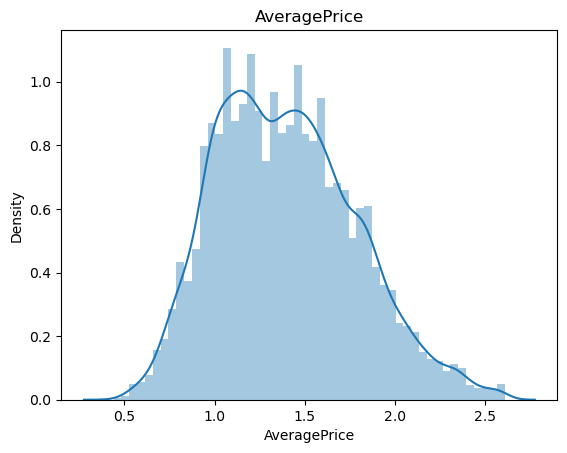

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


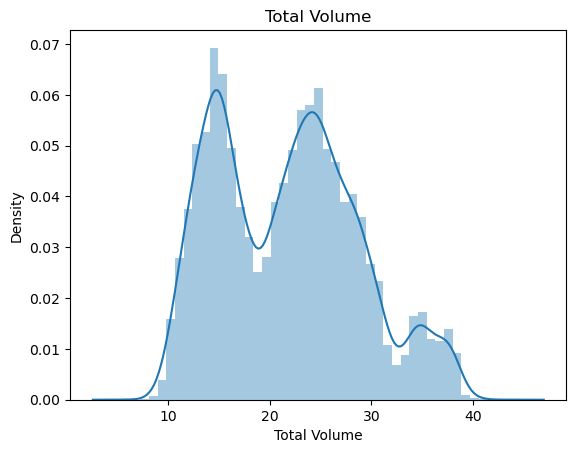

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


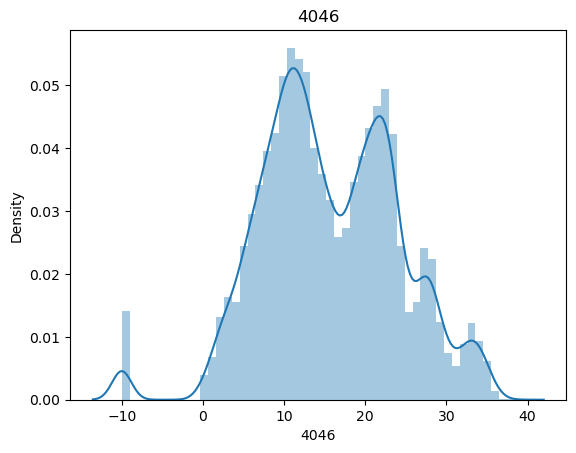

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


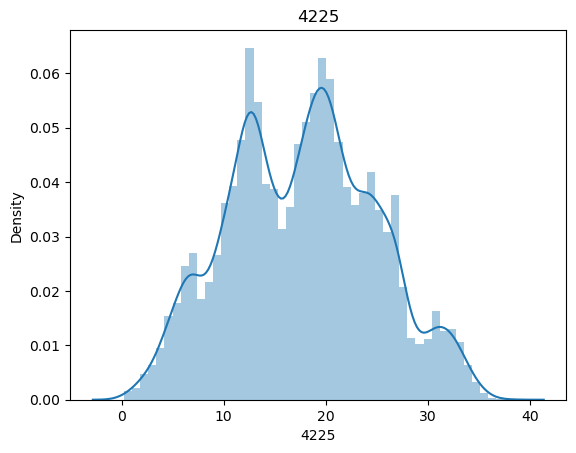

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


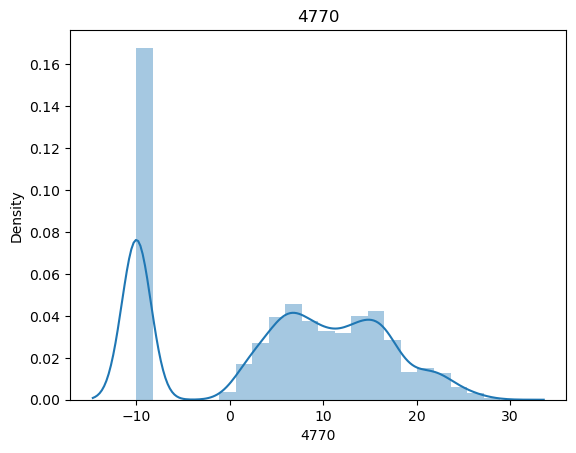

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


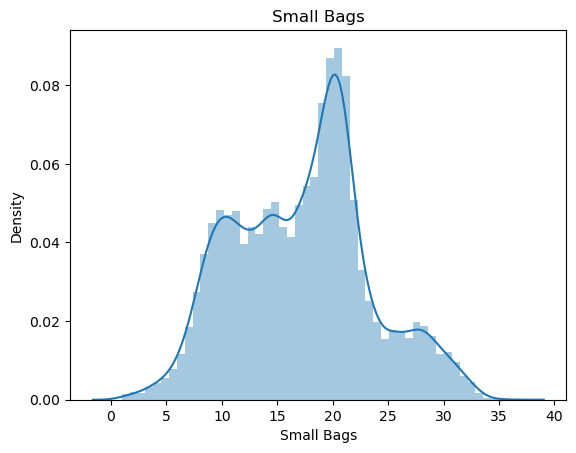

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


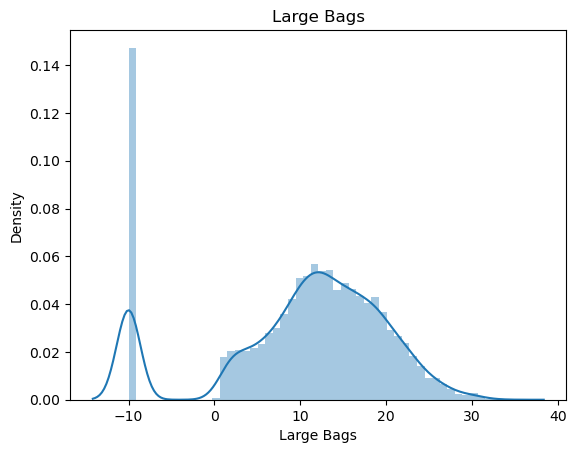

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


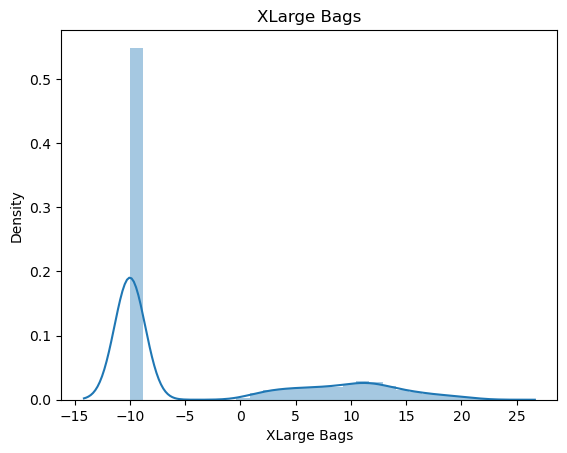

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


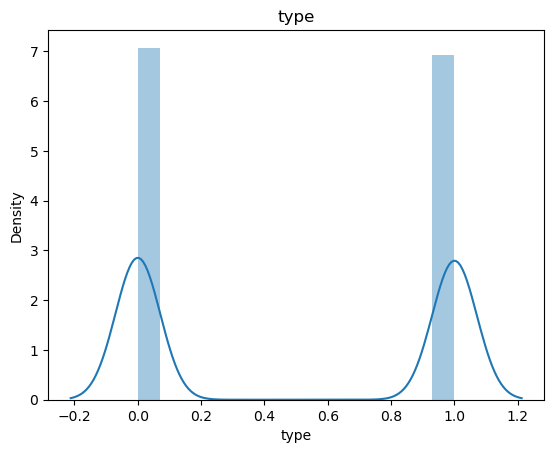

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


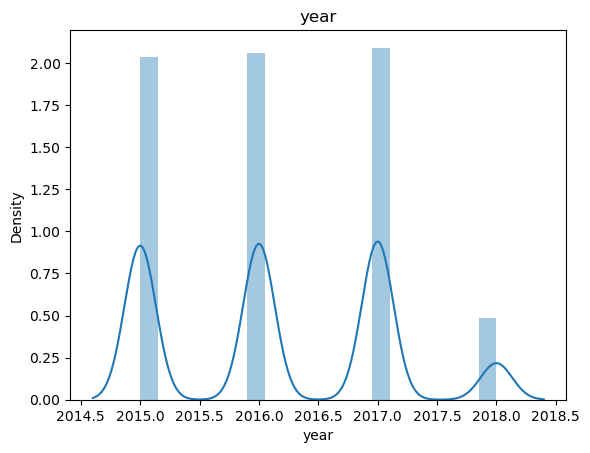

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


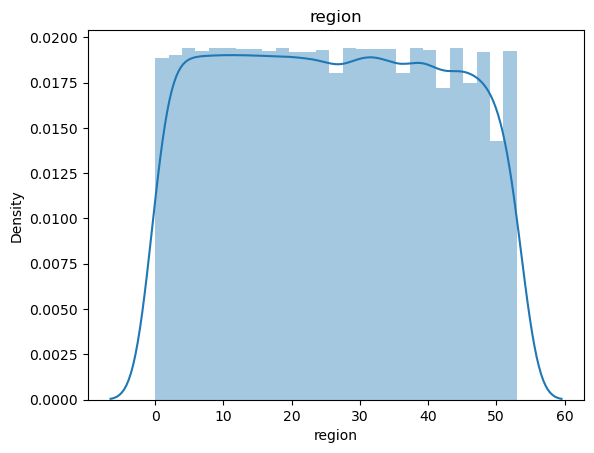

In [103]:
for i in ava2.columns:
    sns.distplot(ava2[i])
    plt.title(i)
    plt.show()

So just for confirmation regarding the skewness and data spread of data we have checked with the skewness values and the distplot of every column.
And it is looking quite ok. So we will go ahead with this data frame.

In [104]:
xx = ava2.iloc[:,1:]
yy = ava2.iloc[:,0]

In [105]:
xx

,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region
0,20.253684,10.024745,19.757994,4.732235,14.743898,5.738556,-10.0,0.0,2015,0.0
1,19.780982,9.181565,19.172340,5.017208,14.966063,5.808695,-10.0,0.0,2015,0.0
2,22.156530,9.499358,21.900849,6.276501,14.577491,5.898008,-10.0,0.0,2015,0.0
3,20.885767,10.201548,20.599830,5.349057,13.736405,6.316711,-10.0,0.0,2015,0.0
4,19.565874,9.832667,19.119604,5.415423,13.862479,6.966743,-10.0,0.0,2015,0.0
...,...,...,...,...,...,...,...,...,...,...
18244,16.499375,11.434380,10.818356,-10.000000,15.799839,8.345658,-10.0,1.0,2018,53.0
18245,15.957574,10.305641,12.570875,-10.000000,14.838991,7.830421,-10.0,1.0,2018,53.0
18246,15.934816,10.306015,11.825592,9.329008,14.951090,4.542675,-10.0,1.0,2018,53.0
18247,16.361219,10.816218,12.255471,9.326537,15.340807,4.787576,-10.0,1.0,2018,53.0


In [106]:
yy

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 17733, dtype: float64

We have separeted out our target variable and our independent variables for this case. Now we will standardize our independent variables.

In [107]:
xx1 = pd.DataFrame(sc.fit_transform(xx), columns = xx.columns)

In [108]:
xx1

,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region
0,-0.213589,-0.673839,0.284344,-0.024502,-0.406445,-0.474483,-0.685883,-0.989733,-1.225718,-1.689491
1,-0.280999,-0.774071,0.202871,0.001396,-0.370374,-0.467328,-0.685883,-0.989733,-1.225718,-1.689491
2,0.057765,-0.736294,0.582447,0.115840,-0.433463,-0.458216,-0.685883,-0.989733,-1.225718,-1.689491
3,-0.123452,-0.652822,0.401456,0.031555,-0.570023,-0.415499,-0.685883,-0.989733,-1.225718,-1.689491
4,-0.311674,-0.696672,0.195534,0.037586,-0.549553,-0.349181,-0.685883,-0.989733,-1.225718,-1.689491
...,...,...,...,...,...,...,...,...,...,...
17728,-0.748971,-0.506270,-0.959292,-1.363360,-0.235001,-0.208501,-0.685883,1.010374,1.963355,1.738790
17729,-0.826234,-0.640448,-0.715491,-1.363360,-0.391006,-0.261066,-0.685883,1.010374,1.963355,1.738790
17730,-0.829479,-0.640403,-0.819171,0.393251,-0.372805,-0.596490,-0.685883,1.010374,1.963355,1.738790
17731,-0.768672,-0.579753,-0.759368,0.393026,-0.309530,-0.571505,-0.685883,1.010374,1.963355,1.738790


We have standardize the data using the standard scaler now we will check for variance inflation facor for independent variables and will remove columns if required.

In [109]:
var = pd.DataFrame()

var['Values'] = [vari(xx1.values,i) for i in range(len(xx1.columns))]
var['Features'] = xx1.columns
var

,Values,Features
0,46.514540,Total Volume
1,6.542143,4046
2,12.149811,4225
3,3.792577,4770
4,10.551559,Small Bags
5,1.965818,Large Bags
6,2.108756,XLarge Bags
7,3.289014,type
8,1.312864,year
9,1.080241,region


So again over here as well the Total Volume column is having a high inflation factor hence we will drop that column and again check for variance inflation factor.

In [110]:
xx1.drop('Total Volume', axis = 1, inplace = True)

In [111]:
xx1

,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region
0,-0.673839,0.284344,-0.024502,-0.406445,-0.474483,-0.685883,-0.989733,-1.225718,-1.689491
1,-0.774071,0.202871,0.001396,-0.370374,-0.467328,-0.685883,-0.989733,-1.225718,-1.689491
2,-0.736294,0.582447,0.115840,-0.433463,-0.458216,-0.685883,-0.989733,-1.225718,-1.689491
3,-0.652822,0.401456,0.031555,-0.570023,-0.415499,-0.685883,-0.989733,-1.225718,-1.689491
4,-0.696672,0.195534,0.037586,-0.549553,-0.349181,-0.685883,-0.989733,-1.225718,-1.689491
...,...,...,...,...,...,...,...,...,...
17728,-0.506270,-0.959292,-1.363360,-0.235001,-0.208501,-0.685883,1.010374,1.963355,1.738790
17729,-0.640448,-0.715491,-1.363360,-0.391006,-0.261066,-0.685883,1.010374,1.963355,1.738790
17730,-0.640403,-0.819171,0.393251,-0.372805,-0.596490,-0.685883,1.010374,1.963355,1.738790
17731,-0.579753,-0.759368,0.393026,-0.309530,-0.571505,-0.685883,1.010374,1.963355,1.738790


In [112]:
var1 = pd.DataFrame()

var1['Values'] = [vari(xx1.values,i) for i in range(len(xx1.columns))]
var1['Features'] = xx1.columns
var1

,Values,Features
0,3.695441,4046
1,4.572161,4225
2,3.756164,4770
3,4.748189,Small Bags
4,1.751023,Large Bags
5,2.099071,XLarge Bags
6,3.242225,type
7,1.305265,year
8,1.078730,region


So, now the variance inflation factor for all the columns looks in the limit and now we can go ahead with implenting the various regression models on it and then choosing best from them.

In [113]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso,Ridge
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

In [114]:
xx_train,xx_test,yy_train,yy_test = train_test_split(xx1,yy, test_size = 0.30, random_state = 42)

In [115]:
lr = LinearRegression()
lr.fit(xx_train,yy_train)
lrpred = lr.predict(xx_test)
lrr2 = r2_score(yy_test, lrpred)
lrmse = mean_squared_error(yy_test, lrpred)
lrmae = mean_absolute_error(yy_test, lrpred)

print(lrr2)
print(lrmse)
print(lrmae)

0.4972826484176681
0.07520711330644259
0.21449754977994473


In [116]:
dtr = DecisionTreeRegressor()
dtr.fit(xx_train,yy_train)
dtrpred = dtr.predict(xx_test)
dtrr2 = r2_score(yy_test, dtrpred)
dtrmse = mean_squared_error(yy_test, dtrpred)
dtrmae = mean_absolute_error(yy_test, dtrpred)

print(dtrr2)
print(dtrmse)
print(dtrmae)

0.6590951253328947
0.050999774436090224
0.1489924812030075


In [117]:
rfr = RandomForestRegressor()
rfr.fit(xx_train,yy_train)
rfrpred = rfr.predict(xx_test)
rfrr2 = r2_score(yy_test, rfrpred)
rfrmse = mean_squared_error(yy_test, rfrpred)
rfrmae = mean_absolute_error(yy_test, rfrpred)

print(rfrr2)
print(rfrmse)
print(rfrmae)

0.8470962978360557
0.022874575578947367
0.10684984962406015


In [118]:
svr = SVR()
svr.fit(xx_train,yy_train)
svrpred = svr.predict(xx_test)
svrr2 = r2_score(yy_test, svrpred)
svrmse = mean_squared_error(yy_test, svrpred)
svrmae = mean_absolute_error(yy_test, svrpred)

print(svrr2)
print(svrmse)
print(svrmae)

0.7191771287110884
0.04201143531964767
0.15161078176532278


In [119]:
knr = KNeighborsRegressor()
knr.fit(xx_train,yy_train)
knrpred = knr.predict(xx_test)
knrr2 = r2_score(yy_test, knrpred)
knrmse = mean_squared_error(yy_test, knrpred)
knrmae = mean_absolute_error(yy_test, knrpred)

print(knrr2)
print(knrmse)
print(knrmae)

0.8141368150139366
0.027805353383458648
0.1161533834586466


In [121]:
gbr = GradientBoostingRegressor()
gbr.fit(xx_train, yy_train)
gbrpred = gbr.predict(xx_test)
gbrr2 = r2_score(yy_test, gbrpred)
gbrmse = mean_squared_error(yy_test, gbrpred)
gbrmae = mean_absolute_error(yy_test, gbrpred)

print(gbrr2)
print(gbrmse)
print(gbrmae)

0.6751558167178211
0.048597075915810195
0.16699756933474771


In [122]:
ls = Lasso()
ls.fit(xx_train,yy_train)
lspred = ls.predict(xx_test)
lsr2 = r2_score(yy_test, lspred)
lsmse = mean_squared_error(yy_test, lspred)
lsmae = mean_absolute_error(yy_test, lspred)

print(lsr2)
print(lsmse)
print(lsmae)

-3.997268927369291e-05
0.14960716852180606
0.3164160186476826


In [123]:
ri = Ridge()
ri.fit(xx_train,yy_train)
ripred = ri.predict(xx_test)
rir2 = r2_score(yy_test, ripred)
rimse = mean_squared_error(yy_test, ripred)
rimae = mean_squared_error(yy_test, ripred)

print(rir2)
print(rimse)
print(rimae)

0.4972788215225634
0.07520768581449873
0.07520768581449873


In [124]:
etr = ExtraTreesRegressor()
etr.fit(xx_train,yy_train)
etrpred = etr.predict(xx_test)
etrr2 = r2_score(yy_test, etrpred)
etrmse = mean_squared_error(yy_test, etrpred)
etrmae = mean_absolute_error(yy_test, etrpred)

print(etrr2)
print(etrmse)
print(etrmae)

0.8704887899529018
0.01937503095488722
0.09683725563909773


Below are the r2_score, mean squared error and mean absolute error for various models.

In [125]:
print('The r2_score, Mean squared error and Mean absolute Error for Linear Regression', lrr2.round(2),',',lrmse.round(2),',',lrmae.round(2))
print('The r2_score, Mean squared error and Mean absolute Error for Decision Tree Regressor', dtrr2.round(2),',', dtrmse.round(2),',',dtrmae.round(2))
print('The r2_score, Mean squared error and Mean absolute Error for Random Forest Classiifer', rfrr2.round(2),',',rfrmse.round(2),',', rfrmae.round(2))
print('The r2_score, Mean squared error and Mean absolute Error for Support Vector Regressor', svrr2.round(2),',',svrmse.round(2),',',svrmae.round(2))
print('The r2_score, Mean squared error and Mean absolute Error for KNeighbors Regressor', knrr2.round(2),',',knrmse.round(2),',',knrmae.round(2))
print('The r2_score, Mean squared error and Mean absolute Error for Gradient Boosting Regresor', gbrr2.round(2),',',gbrmse.round(2),',',gbrmae.round(2))
print('The r2_score, Mean squared error and Mean absolute Error for Lasso', lsr2.round(2),',',lsmse.round(2),',',lsmae.round(2))
print('The r2_score, Mean squared error and Mean absolute Error for Ridge', rir2.round(2),',',rimse.round(2),',',rimae.round(2))
print('The r2_score, Mean squared error and Mean absolute Error for Extra Trees Regressor', etrr2.round(2),',',etrmse.round(2),',',etrmae.round(2))

The r2_score, Mean squared error and Mean absolute Error for Linear Regression 0.5 , 0.08 , 0.21
The r2_score, Mean squared error and Mean absolute Error for Decision Tree Regressor 0.66 , 0.05 , 0.15
The r2_score, Mean squared error and Mean absolute Error for Random Forest Classiifer 0.85 , 0.02 , 0.11
The r2_score, Mean squared error and Mean absolute Error for Support Vector Regressor 0.72 , 0.04 , 0.15
The r2_score, Mean squared error and Mean absolute Error for KNeighbors Regressor 0.81 , 0.03 , 0.12
The r2_score, Mean squared error and Mean absolute Error for Gradient Boosting Regresor 0.68 , 0.05 , 0.17
The r2_score, Mean squared error and Mean absolute Error for Lasso -0.0 , 0.15 , 0.32
The r2_score, Mean squared error and Mean absolute Error for Ridge 0.5 , 0.08 , 0.08
The r2_score, Mean squared error and Mean absolute Error for Extra Trees Regressor 0.87 , 0.02 , 0.1


So From Above table it can be seen that Extra Trees Regressor is having highest R2 Score and less error rate. We will check wit cross val score. 

In [126]:
ss = cross_val_score(lr,xx1,yy)
print(ss)
print(ss.mean())
print(lrr2)

print('The difference between r2 score and cross val score of Linear Regression', lrr2 - ss.mean())

[-0.25513507  0.08540649  0.43463603  0.10319347  0.09536574]
0.09269333232741517
0.4972826484176681
The difference between r2 score and cross val score of Linear Regression 0.40458931609025295


In [127]:
ss1 = cross_val_score(dtr, xx1,yy)
print(ss1)
print(ss1.mean())
print(dtrr2)

print('The difference between r2 score and cross val score of Decision Tree Classifier', dtrr2 - ss1.mean())

[-1.17627252 -0.0949498   0.09305117 -0.40152246 -0.34200981]
-0.38434068520758957
0.6590951253328947
The difference between r2 score and cross val score of Decision Tree Classifier 1.0434358105404842


In [128]:
ss2 = cross_val_score(rfr, xx1,yy)
print(ss2)
print(ss2.mean())
print(rfrr2)

print('The difference between r2 score and cross val score of Random Forest Regressor', rfrr2 - ss2.mean())

[0.17322409 0.3244977  0.57789787 0.25645508 0.05808216]
0.2780313807485851
0.8470962978360557
The difference between r2 score and cross val score of Random Forest Regressor 0.5690649170874706


In [129]:
ss3 = cross_val_score(svr, xx1,yy)
print(ss3)
print(ss3.mean())
print(svrr2)

print('The difference between r2 score and cross val score of Support Vector Regressor', svrr2 - ss3.mean())

[-0.47856631  0.34631051  0.26098272  0.33028449 -0.1013217 ]
0.071537941172376
0.7191771287110884
The difference between r2 score and cross val score of Support Vector Regressor 0.6476391875387124


In [130]:
ss4 = cross_val_score(knr, xx1,yy)
print(ss4)
print(ss4.mean())
print(knrr2)

print('The difference between r2 score and cross val score of KNeighbors Regressor', knrr2 - ss4.mean())

[-0.14534642  0.22917411  0.41777442  0.2382837  -0.10699301]
0.12657856088011898
0.8141368150139366
The difference between r2 score and cross val score of KNeighbors Regressor 0.6875582541338177


In [131]:
ss5 = cross_val_score(gbr, xx1,yy)
print(ss5)
print(ss5.mean())
print(gbrr2)

print('The difference between r2 score and cross val score of Gradient Boost Regressor', gbrr2 - ss.mean())

[0.20556451 0.37884426 0.58053506 0.31717406 0.15241791]
0.3269071599139327
0.6751558167178211
The difference between r2 score and cross val score of Gradient Boost Regressor 0.5824624843904059


In [132]:
ss6 = cross_val_score(ls, xx1,yy)
print(ss6)
print(ss6.mean())
print(lsr2)

print('The difference between r2 score and cross val score of Lasso', lsr2 - ss6.mean())

[-3.69678914 -0.71424279 -0.02519419 -0.50414152 -0.85550216]
-1.1591739593505879
-3.997268927369291e-05
The difference between r2 score and cross val score of Lasso 1.1591339866613142


In [133]:
ss7 = cross_val_score(ri, xx1,yy)
print(ss7)
print(ss7.mean())
print(rir2)

print('The difference between r2 score and cross val score of Ridge', rir2 - ss7.mean())

[-0.25518463  0.08544666  0.43463688  0.10317711  0.09536265]
0.09268773392158232
0.4972788215225634
The difference between r2 score and cross val score of Ridge 0.4045910876009811


In [134]:
ss8 = cross_val_score(etr,xx1,yy)
print(ss8)
print(ss8.mean())
print(etrr2)

print('The difference between r2 score and cross val score of',etrr2 - ss8.mean())

[0.25862377 0.38237949 0.59855566 0.36026553 0.10779893]
0.34152467468571646
0.8704887899529018
The difference between r2 score and cross val score of 0.5289641152671853


So from cross val score as well the Extra Tree Regressor is having best values.

In [135]:
from sklearn.model_selection import GridSearchCV

In [156]:
parameters = {'n_estimators': [100, 200, 300,400,500]}

In [157]:
GCV = GridSearchCV(ExtraTreesRegressor(), parameters)

In [158]:
GCV.fit(xx_train, yy_train)

GridSearchCV(estimator=ExtraTreesRegressor(),
             param_grid={'n_estimators': [100, 200, 300, 400, 500]})

In [159]:
GCV.best_params_

{'n_estimators': 500}

In [160]:
GCV.best_score_

0.8493062369659439

In [161]:
fmr = ExtraTreesRegressor(n_estimators = 500)

In [165]:
fmr.fit(xx_train,yy_train)
fmrpred = fmr.predict(xx_test)
fmrac = r2_score(yy_test,fmrpred)
fmrmse = mean_squared_error(yy_test,fmrpred)
fmrmae = mean_absolute_error(yy_test,fmrpred)

print(fmrac.round(2))
print(fmrmse)
print(fmrmae)

0.87
0.01923236491375942
0.09618607894736848


So our Final Model for regresssion model is 87% now we will go ahead and save it.

In [166]:
joblib.dump(fmr,'Avacado Regression')

['Avacado Regression']

In [167]:
mr = joblib.load('Avacado Regression')

In [168]:
predict = mr.predict(xx_test)

In [169]:
A = np.array(yy_test)

In [170]:
avareg = pd.DataFrame()

avareg['Predicted'] = predict
avareg['Original'] = A

In [171]:
avareg

,Predicted,Original
0,1.66606,1.69
1,1.34210,1.15
2,1.23844,1.37
3,1.67826,1.66
4,1.65574,1.63
...,...,...
5315,1.51138,1.88
5316,1.33698,1.29
5317,0.68550,0.67
5318,1.00278,0.99


<AxesSubplot:xlabel='Predicted', ylabel='Original'>

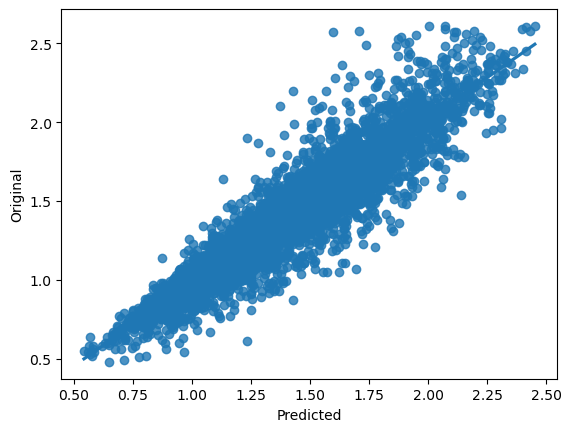

In [172]:
sns.regplot(x = 'Predicted', y = 'Original', data = avareg)

So from above data frame and the regplot it can it seen that our model is learning well as well as predicting well.